<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/NLP_%EC%9E%A5%EA%B8%B0_%EC%9D%98%EC%A1%B4%EC%84%B1_%EB%AC%B8%EC%A0%9C_%ED%99%95%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

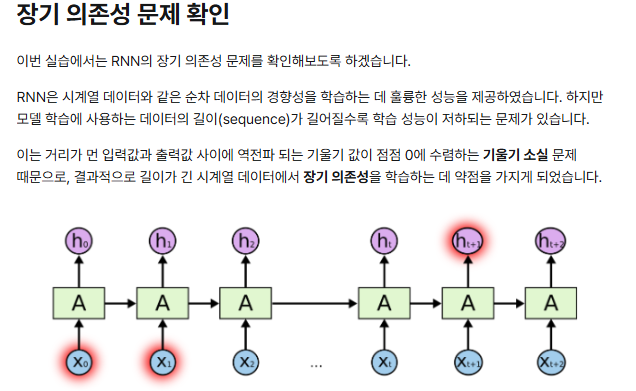

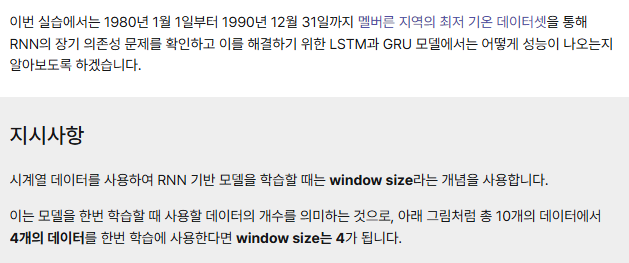

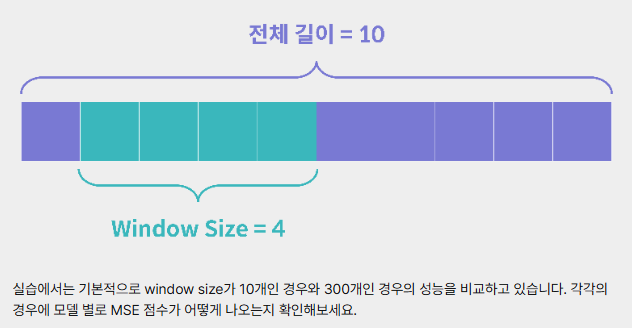

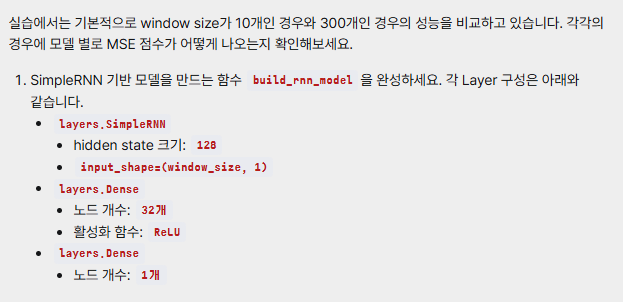

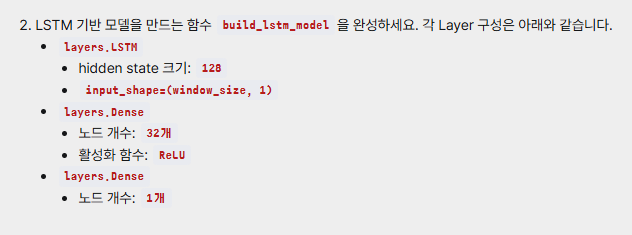

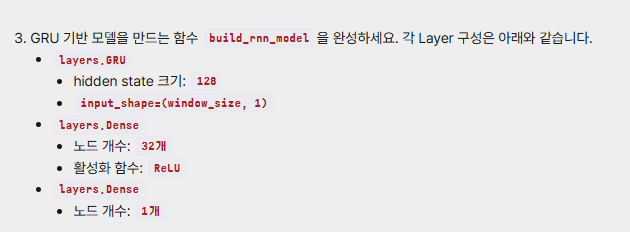

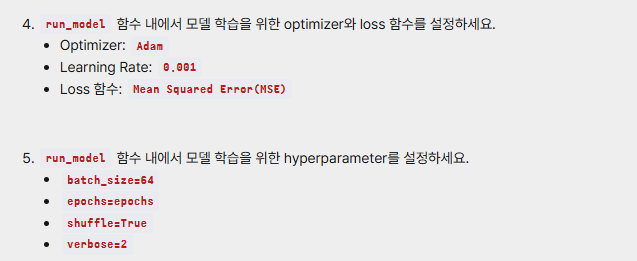

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np

def load_data(window_size):
    raw_data = pd.read_csv("./daily-min-temperatures.csv")
    raw_temps = raw_data["Temp"]

    mean_temp = raw_temps.mean()
    stdv_temp = raw_temps.std(ddof=0)
    raw_temps = (raw_temps - mean_temp) / stdv_temp

    X, y = [], []
    for i in range(len(raw_temps) - window_size):
        cur_temps = raw_temps[i:i + window_size]
        target = raw_temps[i + window_size]

        X.append(list(cur_temps))
        y.append(target)

    X = np.array(X)
    y = np.array(y)
    X = X[:, :, np.newaxis]

    total_len = len(X)
    train_len = int(total_len * 0.8)

    X_train, y_train = X[:train_len], y[:train_len]
    X_test, y_test = X[train_len:], y[train_len:]

    return X_train, X_test, y_train, y_test

def build_rnn_model(window_size):
    model = Sequential()

    # TODO: [지시사항 1번] Simple RNN과 Fully-connected Layer로 구성된 모델을 완성하세요.
    model.add(layers.SimpleRNN(128, input_shape=(window_size, 1)))
    model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dense(1))

    return model

def build_lstm_model(window_size):
    model = Sequential()

    # TODO: [지시사항 2번] LSTM과 Fully-connected Layer로 구성된 모델을 완성하세요.
    model.add(layers.LSTM(128, input_shape=(window_size, 1)))
    model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dense(1))

    return model

def build_gru_model(window_size):
    model = Sequential()

    # TODO: [지시사항 3번] GRU와 Fully-connected Layer로 구성된 모델을 완성하세요.
    model.add(layers.GRU(128, input_shape=(window_size, 1)))
    model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dense(1))

    return model

def run_model(model, X_train, X_test, y_train, y_test, epochs=10, model_name=None):
    # TODO: [지시사항 4번] 모델 학습을 위한 optimizer와 loss 함수를 설정하세요.
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="mse")

    # TODO: [지시사항 5번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(X_train, y_train, epochs=epochs, batch_size=64, shuffle=True, verbose=2)

    # 테스트 데이터셋으로 모델을 테스트합니다.
    test_loss = model.evaluate(X_test, y_test, verbose=0)

    return test_loss, optimizer, hist

def main(window_size):
    tf.random.set_seed(2022)
    X_train, X_test, y_train, y_test = load_data(window_size)

    rnn_model = build_rnn_model(window_size)
    lstm_model = build_lstm_model(window_size)
    gru_model = build_gru_model(window_size)

    rnn_test_loss, _, _ = run_model(rnn_model, X_train, X_test, y_train, y_test, model_name="RNN")
    lstm_test_loss, _, _ = run_model(lstm_model, X_train, X_test, y_train, y_test, model_name="LSTM")
    gru_test_loss, _, _ = run_model(gru_model, X_train, X_test, y_train, y_test, model_name="GRU")

    return rnn_test_loss, lstm_test_loss, gru_test_loss

if __name__ == "__main__":
    # 10일치 데이터를 보고 다음날의 기온을 예측합니다.
    rnn_10_test_loss, lstm_10_test_loss, gru_10_test_loss = main(10)

    # 300일치 데이터를 보고 다음날의 기온을 예측합니다.
    rnn_300_test_loss, lstm_300_test_loss, gru_300_test_loss = main(300)

    print("=" * 20, "시계열 길이가 10 인 경우", "=" * 20)
    print("[RNN ] 테스트 MSE = {:.5f}".format(rnn_10_test_loss))
    print("[LSTM] 테스트 MSE = {:.5f}".format(lstm_10_test_loss))
    print("[GRU ] 테스트 MSE = {:.5f}".format(gru_10_test_loss))
    print()

    print("=" * 20, "시계열 길이가 300 인 경우", "=" * 20)
    print("[RNN ] 테스트 MSE = {:.5f}".format(rnn_300_test_loss))
    print("[LSTM] 테스트 MSE = {:.5f}".format(lstm_300_test_loss))
    print("[GRU ] 테스트 MSE = {:.5f}".format(gru_300_test_loss))
    print()

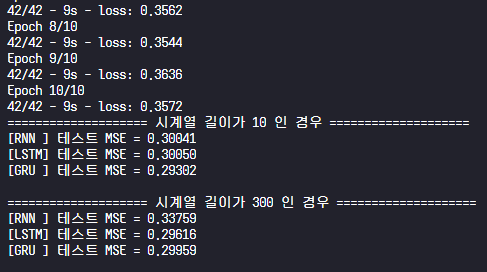